# DATA PREPARATION

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime


# JOHNS HOPKINS GITHUB csv data 

In [5]:
data_path= 'time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [6]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180259,180347,180419,180520,180584,180615,180615,180688,180741,180784
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276101,276101,276221,276221,276310,276342,276401,276415,276468,276518
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265877,265884,265887,265889,265889,265889,265897,265900,265904,265909
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,43067,43067,43067,43067,43067,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [7]:
time_idx=pd_raw.columns[4:]

In [8]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [9]:
pd_raw['Country/Region']

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
280      West Bank and Gaza
281    Winter Olympics 2022
282                   Yemen
283                  Zambia
284                Zimbabwe
Name: Country/Region, Length: 285, dtype: object

In [11]:
pd_raw[pd_raw['Country/Region']=='India'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [13]:
country_list=['India', 'Germany', 'Canada']

In [15]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

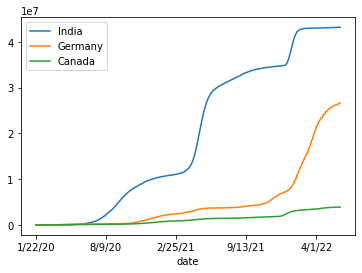

In [16]:
%matplotlib inline
df_plot.set_index('date').plot()

# DATA TYPE DATE

In [17]:
df_plot.head()

,date,India,Germany,Canada
0,1/22/20,0,0,0
1,1/23/20,0,0,2
2,1/24/20,0,0,3
3,1/25/20,0,0,3
4,1/26/20,0,0,3


In [18]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str) 

In [19]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
df_plot.head()

,date,India,Germany,Canada
0,2020-01-22,0,0,0
1,2020-01-23,0,0,2
2,2020-01-24,0,0,3
3,2020-01-25,0,0,3
4,2020-01-26,0,0,3


In [21]:
data_path = 'time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [22]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180259,180347,180419,180520,180584,180615,180615,180688,180741,180784
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276101,276101,276221,276221,276310,276342,276401,276415,276468,276518
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265877,265884,265887,265889,265889,265889,265897,265900,265904,265909
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,43067,43067,43067,43067,43067,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [23]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [24]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,180259,180347,180419,180520,180584,180615,180615,180688,180741,180784
1,no,Albania,0,0,0,0,0,0,0,0,...,276101,276101,276221,276221,276310,276342,276401,276415,276468,276518
2,no,Algeria,0,0,0,0,0,0,0,0,...,265877,265884,265887,265889,265889,265889,265897,265900,265904,265909
3,no,Andorra,0,0,0,0,0,0,0,0,...,42894,42894,42894,42894,43067,43067,43067,43067,43067,43224
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [25]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [26]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [27]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [28]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [30]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('COVID_relational_confirmed.csv',sep=';',index=False)

In [32]:
print(pd_relational_model[pd_relational_model['country']=='India'].tail())

             date state country  confirmed
246406 2022-06-04    no   India   43176817
246691 2022-06-05    no   India   43181335
246976 2022-06-06    no   India   43185049
247261 2022-06-07    no   India   43190282
247546 2022-06-08    no   India   43197522


In [33]:
print(pd_relational_model[pd_relational_model['country']=='Germany'].tail())

             date state  country  confirmed
246393 2022-06-04    no  Germany   26493235
246678 2022-06-05    no  Germany   26496611
246963 2022-06-06    no  Germany   26498361
247248 2022-06-07    no  Germany   26583016
247533 2022-06-08    no  Germany   26660652


In [34]:
print(pd_relational_model[pd_relational_model['country']=='Canada'].tail())

             date                   state country  confirmed
247439 2022-06-08    Prince Edward Island  Canada      38686
247441 2022-06-08                  Quebec  Canada    1070885
247443 2022-06-08  Repatriated Travellers  Canada         13
247448 2022-06-08            Saskatchewan  Canada     138707
247466 2022-06-08                   Yukon  Canada       4404


In [ ]:
New structure of the file attention

In [36]:
data_path='time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15939,15963,15969,15978,15978,15978,15978,16032,16052,16065
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,56329,56512,56580,56648,56648,56648,56648,56895,56955,57024
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5695,5707,5710,5714,5714,5714,5714,5719,5733,5734
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6491,6500,6508,6512,6512,6512,6512,6534,6535,6540
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15061,15073,15077,15084,15084,15084,15084,15096,15112,15115


In [37]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [39]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [40]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [ ]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [41]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

              date    state country  confirmed
246796  2020-01-22  Alabama      US          0
246797  2020-01-22  Alabama      US          0
246798  2020-01-22  Alabama      US          0
246799  2020-01-22  Alabama      US          0
246800  2020-01-22  Alabama      US          0
...            ...      ...     ...        ...
3150989 2022-06-08  Wyoming      US      10403
3150990 2022-06-08  Wyoming      US       5702
3150991 2022-06-08  Wyoming      US        200
3150992 2022-06-08  Wyoming      US       2371
3150993 2022-06-08  Wyoming      US       1604

[2904198 rows x 4 columns]


In [43]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [44]:

check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
...,...,...
2022-06-04,US,84748884
2022-06-05,US,84762022
2022-06-06,US,84882287
